# Приоритизация и проверка гипотез с помощью А/В тестов.

Крупному интернет-магазину требуется выбрать и проверить гипотезу для увеличения выручки. Необходимо приоритизировать выдвинутые гипотезы, запустить A/B-тест и проанализировать его результаты.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st
import math as mth
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

%config InlineBackend.figure_format = 'retina'

## Часть 1. Приоритизация гипотез

Рассмотрим файл с данными о выдвинутых гипотезах.

In [ ]:
hypo = pd.read_csv('/datasets/hypothesis.csv')
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Выполним приоритизацию гипотез с помощью двух фреймворков.

In [ ]:
#ICE
hypo['ICE'] = hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']
hypo[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#можно лучше**

ICE верно рассчитан, но его стоило округлить для лучшей считываемости результатов
</div>

In [ ]:
#RICE
hypo['RICE'] = hypo['Reach'] * hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']
hypo[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [ ]:
hypo.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу.

Фреймворк ICE не учитывает охват пользователей, поэтому оценки у гипотез получились разными.

Следует взять в разработку гипотезу, которая получила максимум баллов по RICE. Собрав базу данных по нашим клиентам, мы сможем не только делать email-рассылку, но, в том числе, сможем предалагать им скидку ко дню рождения, как предалагается по результатам ICE.

## Часть 2. Анализ A/B-теста

### Предобработка данных

Рассмотрим файлы с информацией о проводимом кормпанией А/В тесте. 

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В данных нет пропусков. Колонку с датами в обоих файлах нужно привести к верному формату.

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info(), orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


(None, None)

В файле с заказами рассмотрим состав групп теста.

In [ ]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [ ]:
orders['visitorId'].nunique()

1031

In [ ]:
orders.query('visitorId == 4256040402')

,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


Мы видим, что у нас число заказов превышает число покупателей, и это нормально - один покупатель может сделать несколько заказов. Однако, один покупатель по условиям А/В теста никак не может попадать в разные группы теста. А именно это произошло, например, с покупателем 'visitorId == 4256040402'. Нужно выяснить, много ли у нас таких случаев и что делать с такими данными.

In [ ]:
group_a_visitors = list(orders.query('group == "A"')['visitorId'].unique())
group_b_visitors = list(orders.query('group == "B"')['visitorId'].unique())
len(group_a_visitors), len(group_b_visitors)

(503, 586)

Всего у нас 1031 покупатель. А при подсчете покупателей в каждой группе отдельно, всего получается 1089, то есть 58 человек попали в обе группы.

Проверим эти данные еще раз и удалим этих пользователей и их заказы из датасета, иначе невозможно анализировать А/В тест.

In [ ]:
orders[orders['visitorId'].isin(group_a_visitors)].query('group == "B"')['visitorId'].nunique()

58

In [ ]:
ab_groups = list(orders[orders['visitorId'].isin(group_a_visitors)].query('group == "B"')['visitorId'].unique())
len(ab_groups)

58

In [ ]:
orders_clean = orders[~orders['visitorId'].isin(ab_groups)]
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [ ]:
orders_clean['visitorId'].nunique()

973

In [ ]:
orders_clean['visitorId'].count()

1016

In [ ]:
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Непригодные для анализа данные удалены, посмотрим, совпадают ли в файлах даты сбора данных. Также нужно посмотреть, равны ли у нас группы для сравнения.

In [ ]:
orders_clean['date'].min(), orders_clean['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [ ]:
visitors['date'].min(), visitors['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [ ]:
orders_clean.groupby('group')['visitorId'].count()

group
A    468
B    548
Name: visitorId, dtype: int64

In [ ]:
orders_clean.groupby('group')['visitorId'].nunique()

group
A    445
B    528
Name: visitorId, dtype: int64

Группы не равны по численности участников, в группе А меньше покупателей. Соответственно, 46% заказов в группе А, 54% заказов в группе В. 

In [ ]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

После удаления данных из таблицы с заказами хорошо было бы переформировать таблицу с посетителями, но у нас такой возможности нет. Вручную удалить оттуда пользователей, которые попали в обе группы, тоже не получится - в данных нет ID посетителей.

### График кумулятивной выручки по группам

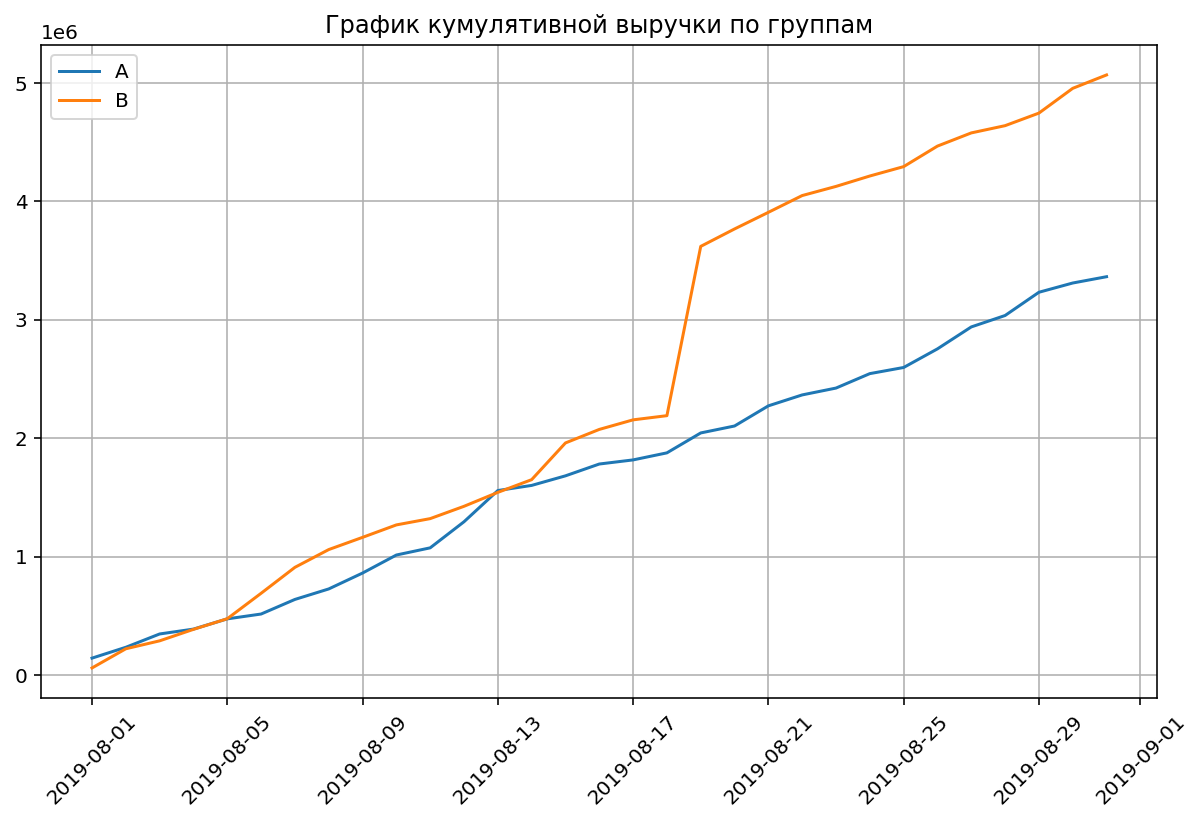

In [ ]:
fig = plt.figure(figsize=(10,6))
datesGroups = orders_clean[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_clean[
        np.logical_and(
            orders_clean['date'] <= x['date'], orders_clean['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cumulativeRevenueA.sort_values(by='date').tail(1)

,date,revenue,orders
60,2019-08-31,3364656,468


In [ ]:
cumulativeRevenueB.sort_values(by='date').tail(1)

,date,revenue,orders
61,2019-08-31,5068972,548


Выручка обеих групп растет в течение всего теста. Группа А по накопленным показателям выручки хуже, чем группа В. В начале теста выручка групп была почти одинакова. После 17 числа выручка группы В сильно возросла. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Рассмотрим, не повлияли ли на выручку показатели среднего чека.

###  График кумулятивного среднего чека по группам

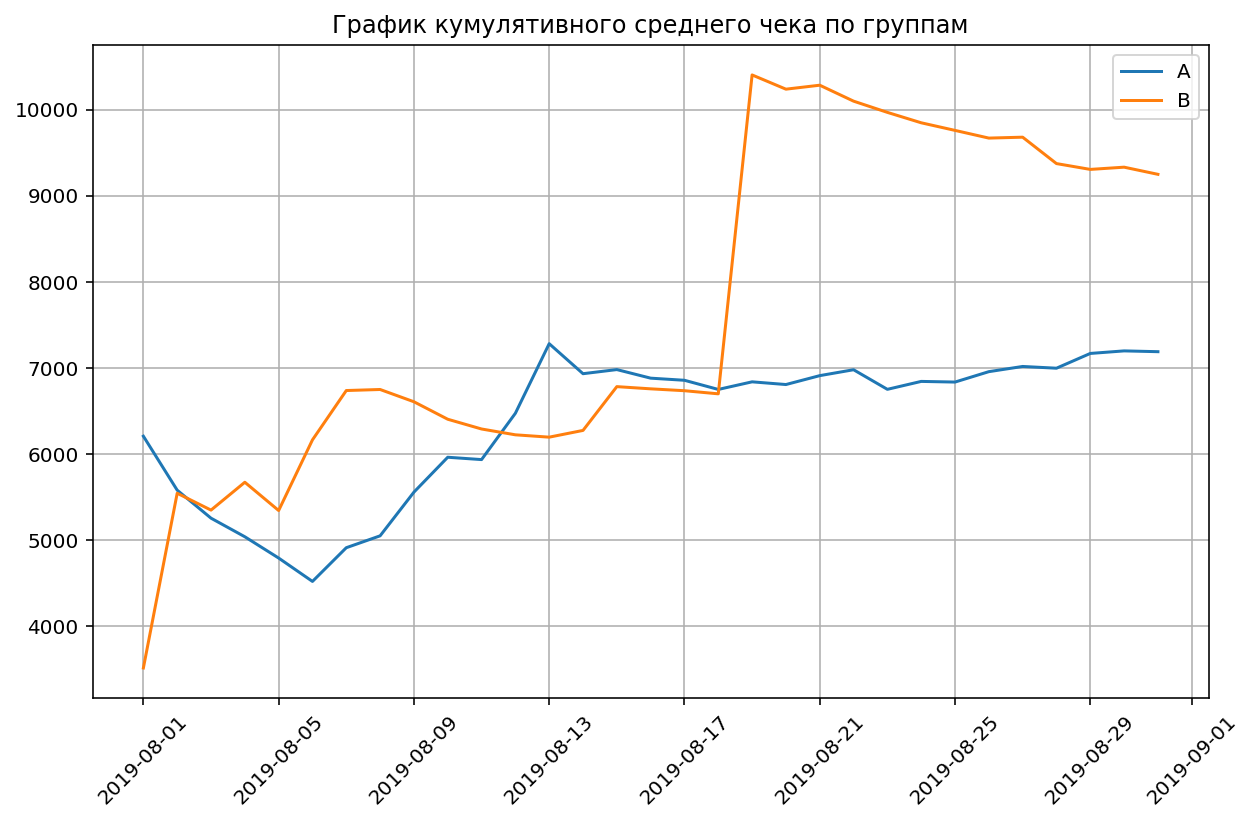

In [ ]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
fig = plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.show()

Средний чек для группы А становится равномерным после 13-го числа, до этого видны сильные колебания. В группе В 19 числа виден резкий рост суммы среднего чека, до этого были видны и другие резкие колебания. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

###  График относительного изменения кумулятивного среднего чека группы B к группе A

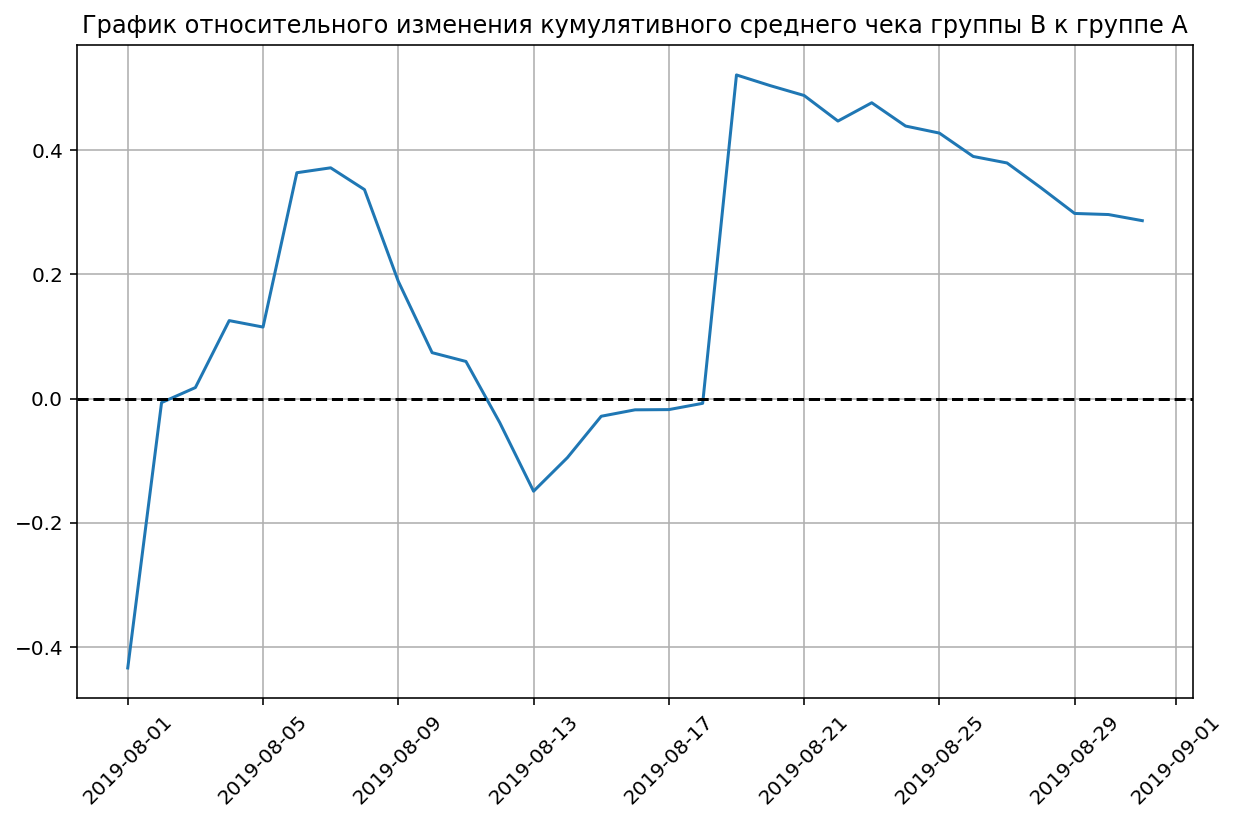

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xticks(rotation=45)
plt.show()

В нескольких точках график резко «скачет». Это указывает на присутствие в выборке аномально крупных заказов и выбросов.

###  График кумулятивной конверсии по группам

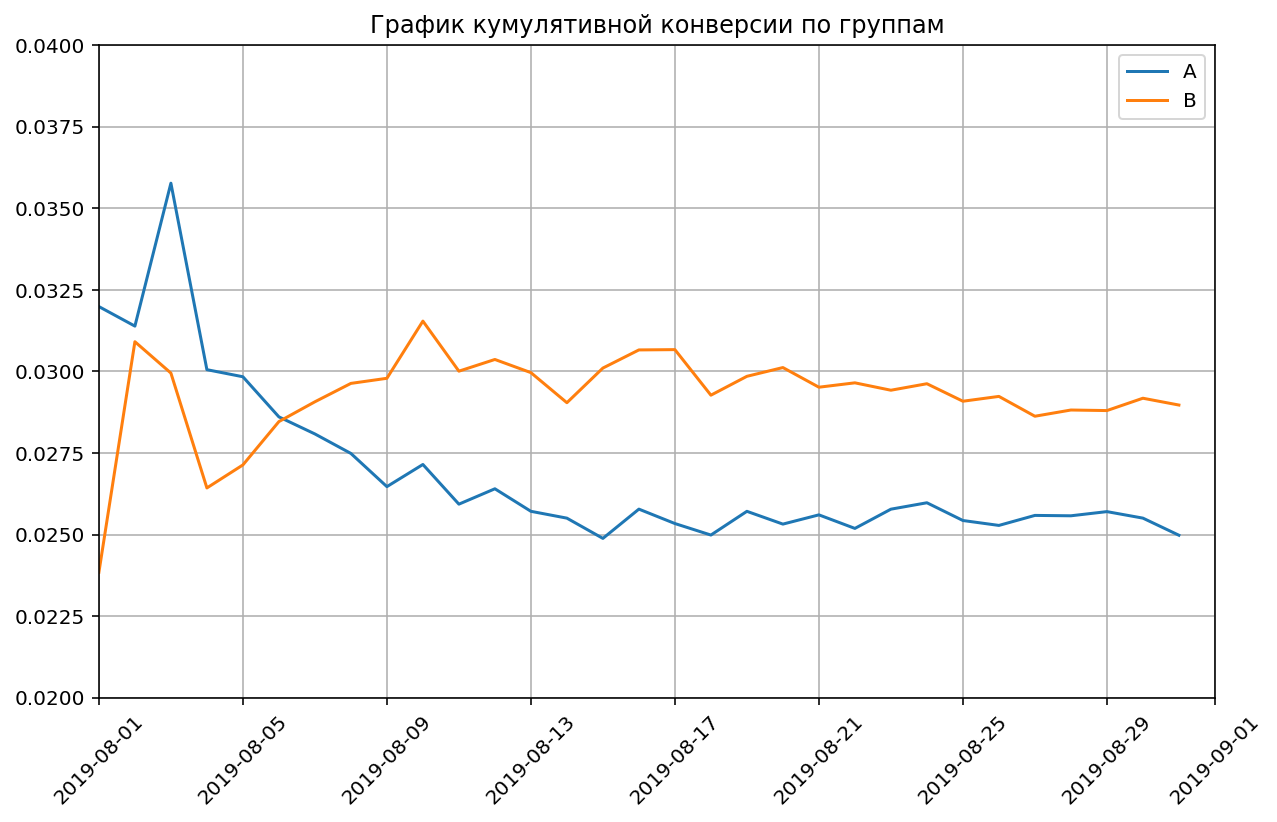

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig = plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04 ])
plt.grid()
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=45)
plt.show()

В начале теста конверсия была выше в группе А, но в этой группе видно постоянное падение конверсии в течение всего времени теста. После 6-го числа конверсия группы В увеличилась, превысила конверсию группы А и зафиксировалась.

###  График относительного изменения кумулятивной конверсии группы B к группе A

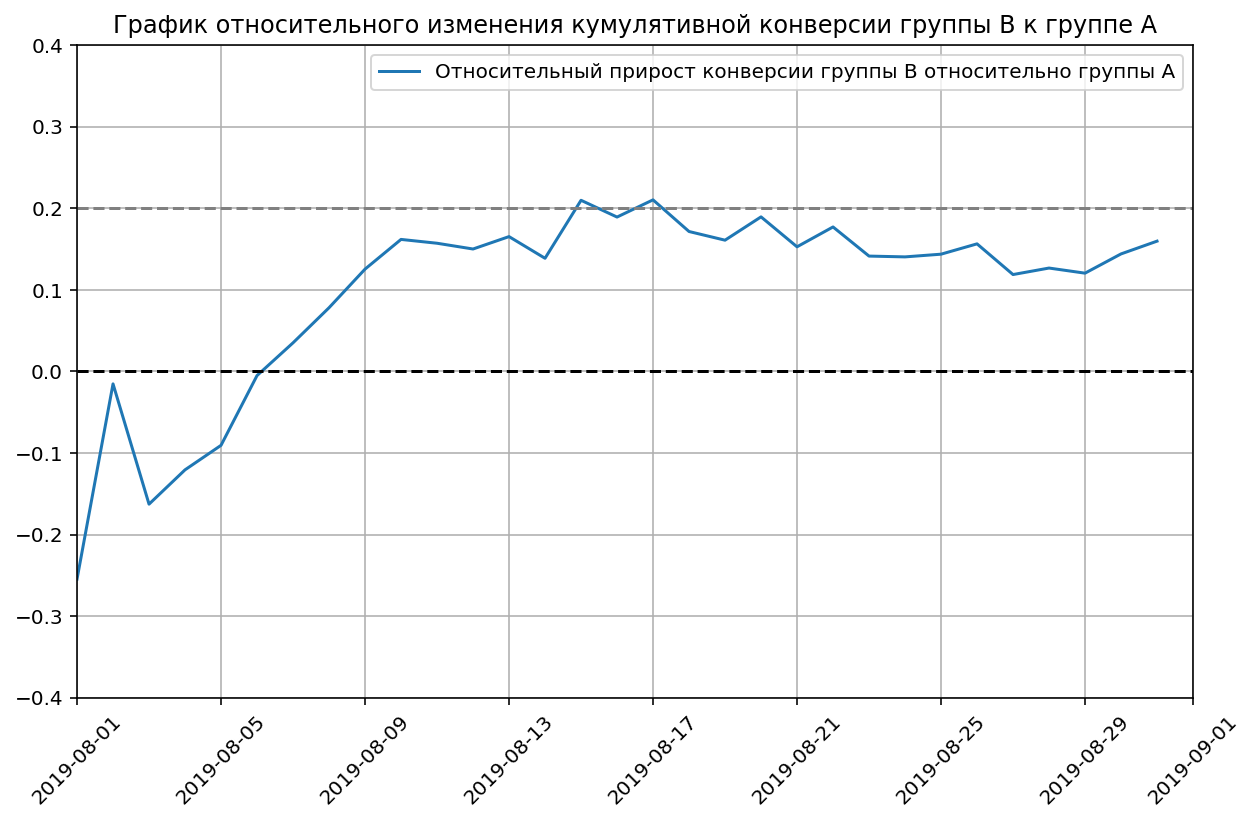

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig = plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.grid()
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.show()

В начале теста группа B проигрывала группе A, затем вышла вперёд и стабильно показывает лучшую коверсию начиная с 10 числа. Показатели прироста колебались на уровне 12-20% выше кумулятивной конверсии группы А. 

### Точечный график количества заказов по пользователям

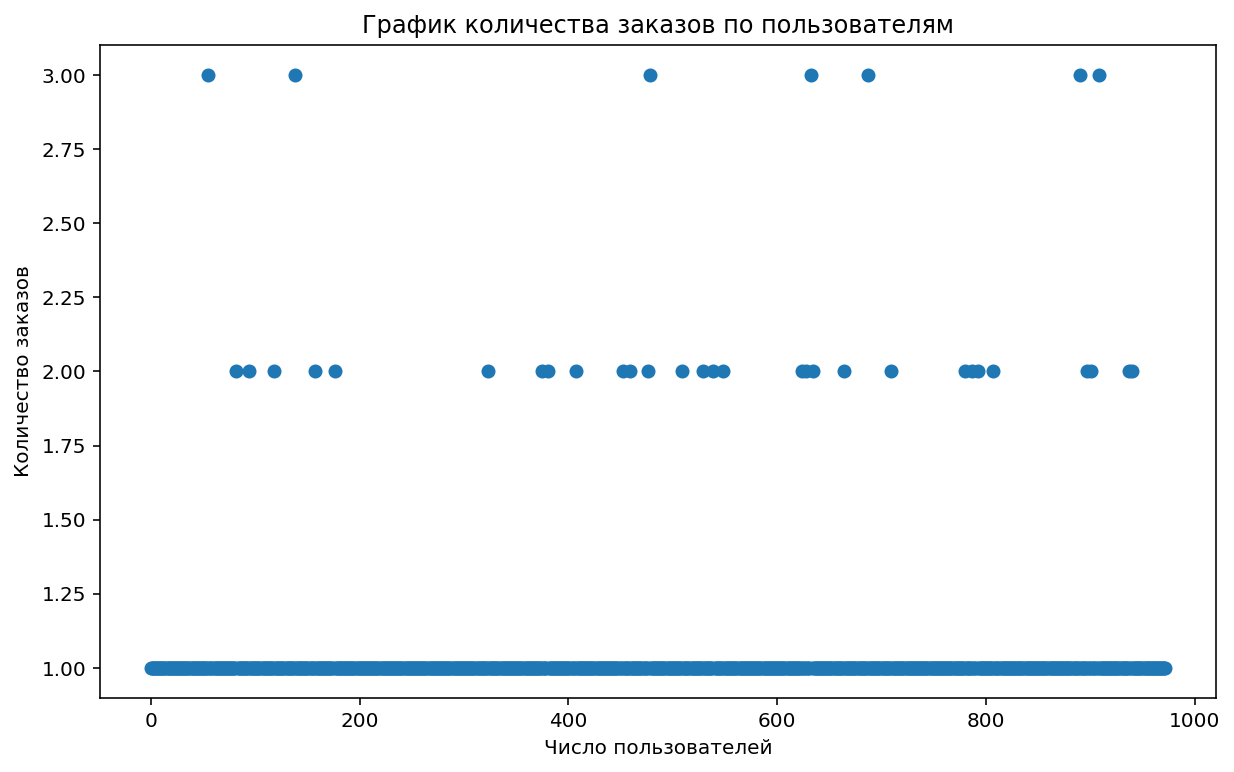

In [ ]:
orders_by_users = (
    orders_clean.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns = ['userId', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders_by_users)))
fig = plt.figure(figsize=(10,6))
plt.scatter(x_values, orders_by_users['orders']) 

plt.xlabel("Число пользователей")
plt.ylabel("Количество заказов")
plt.title("График количества заказов по пользователям")
plt.show()

In [ ]:
orders_by_users.query('orders >= 2')['userId'].nunique(), orders_by_users['userId'].nunique()

(36, 973)

Очевидно, что подавляющее число покупателей (96.3%) сделали только один заказ. 

### Определение 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [ ]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [ ]:
orders_by_users['orders'].unique()

array([1, 3, 2])

In [ ]:
np.percentile(orders_by_users['orders'], [90, 95, 99]) 

array([1., 1., 2.])

Мы видим, что не более 5% пользователей сделали больше одного заказа. Можно заключить, что аномальный пользователь - это тот, который сделал заказ 2 и более раз.

### Точечный график стоимостей заказов

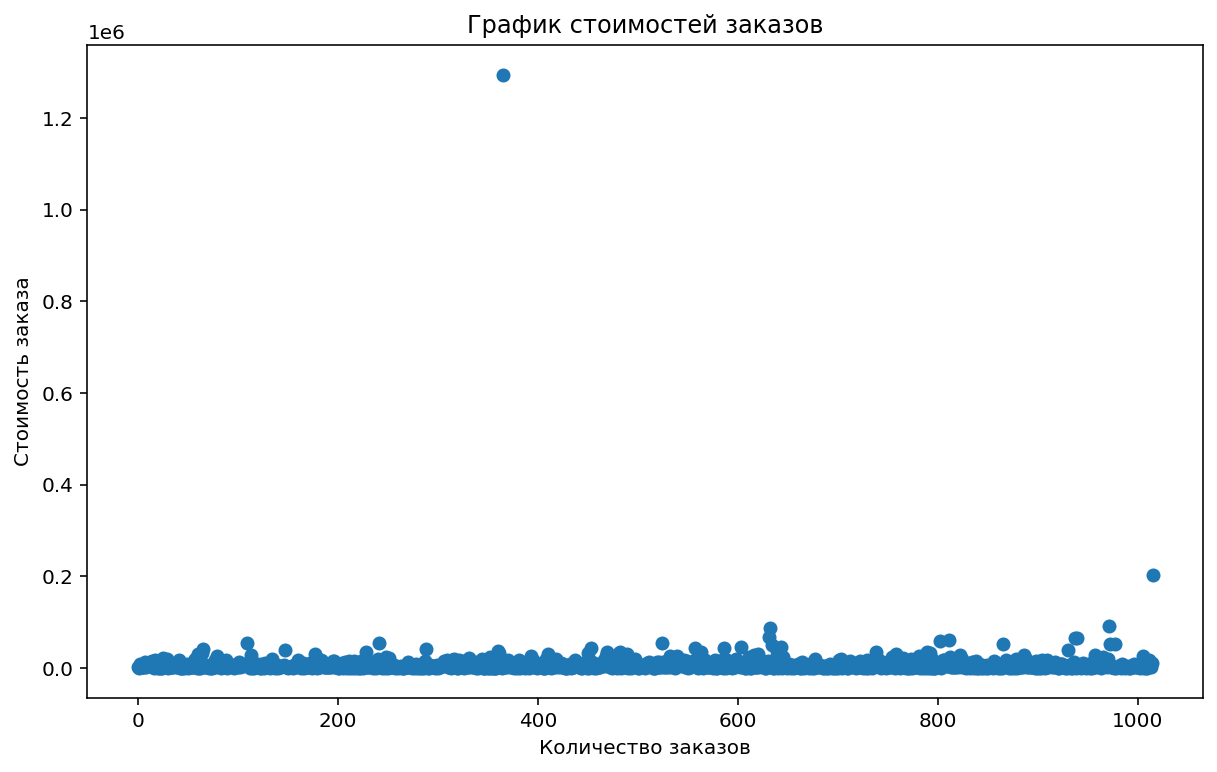

In [ ]:
orders_clean.sort_values(by='revenue', ascending=False).head(10)

x_values = pd.Series(range(0, len(orders_clean['revenue'])))
fig = plt.figure(figsize=(10,6))
plt.scatter(x_values, orders_clean['revenue'])

plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказа")
plt.title("График стоимостей заказов")
plt.show()

In [ ]:
orders_clean['revenue'].min(), orders_clean['revenue'].max()

(50, 1294500)

In [ ]:
orders_clean.query('revenue == 1294500')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [ ]:
orders_clean['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
1136      92550
744       86620
743       67990
1103      66350
1099      65710
949       60450
940       58550
131       53904
Name: revenue, dtype: int64

In [ ]:
orders_clean['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

19 числа покупателем в группе В была совершена покупка стоимостью почти 1,3 млн руб., которая и вызвала скачок в сумме среднего чека и уровне конверсии в этой группе. При медианной стоимости покупки на сайте в размере 3 тысяч рублей, заказы, стоимостью более 20 тысяч рублей можно определенно отнести к выбросам. Просчитаем 95 и 99 перцентили для стоимости заказов. 

###  Определение 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [ ]:
np.percentile(orders_clean['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% пользователей совершили покупку на сумму свыше 26,8 тыс.руб., и не более 1 % - на сумму свыше 53,9 тыс.руб. Примем за границу аномального заказа 30 тыс.рублей.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_clean[orders_clean['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_clean[orders_clean['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

In [ ]:
ordersByUsersA = (
    orders_clean[orders_clean['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
 
ordersByUsersB = (
    orders_clean[orders_clean['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print(
    "{0:.3f}".format(
        (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum())
        / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
        - 1
    )
)

0.00551
0.160


Вывод: По «сырым» данным различие в конверсии групп A и B есть.
Первое число — p-value = 0.00551 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B к конверсии группы А равен 16 %.

Далее посчитаем статистическую значимость различий по "сырым" данным в среднем чеке, а затем проверим все заново уже по данным, очищенным от выбросов.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print(
    "{0:.3f}".format(
        st.mannwhitneyu(
            orders_clean[orders_clean['group'] == 'A']['revenue'],
            orders_clean[orders_clean['group'] == 'B']['revenue'],
        )[1]
    )
)
print(
    "{0:.3f}".format(
        orders_clean[orders_clean['group'] == 'B']['revenue'].mean()
        / orders_clean[orders_clean['group'] == 'A']['revenue'].mean()
        - 1
    )
)

0.415
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B при этом значительно выше среднего чека группы A (на 28,7%), но мы помним про заказ в 1,3 млн руб. и проверим показатели статистической значимости в конверсии и среднем чеке по данным без выбросов.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Очистим наши данные от аномалий и выбросов.
Напомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя.
Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.


In [ ]:
usersWithManyOrders =  pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_clean[orders_clean['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64

Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [ ]:
'{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]),

('0.00627',)

In [ ]:
'{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)

'0.180'

По "сырым" данным у нас p-value был 0.00551, а разница в конверсии 16% в пользу группы В. Сейчас р-value меньше 0.05, а разница между группами увеличилась до 18%. Очищенные данные подтверждают выводы по "сырым". 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'A',
                    np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'B',
                    np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders_clean[
            np.logical_and(
                orders_clean['group'] == 'B',
                np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_clean[
            np.logical_and(
                orders_clean['group'] == 'A',
                np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.414
-0.011


Р-value все еще значительно больше 0.05, так что мы не можем утверждать, что между средними чеками есть различие. По данным без выбросов хорошо видно, что сердний чек в группе В даже меньше, чем в группе А на 1,1%. По неочищенным данным средний чек группы B был выше среднего чека группы A на 28,7%).

### Графики кумулятивной выручки и кумулятивного среднего чека по группам после удаления аномальных значений

In [ ]:
big_rev = list(orders_clean.query('revenue > 30000')['visitorId'])
big_amount = list(orders_by_users.query('orders >= 2')['userId'])

In [ ]:
orders_new = orders_clean[~orders_clean['visitorId'].isin(big_amount)]

In [ ]:
orders_new = orders_clean[~orders_clean['visitorId'].isin(big_rev)]
orders_new

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


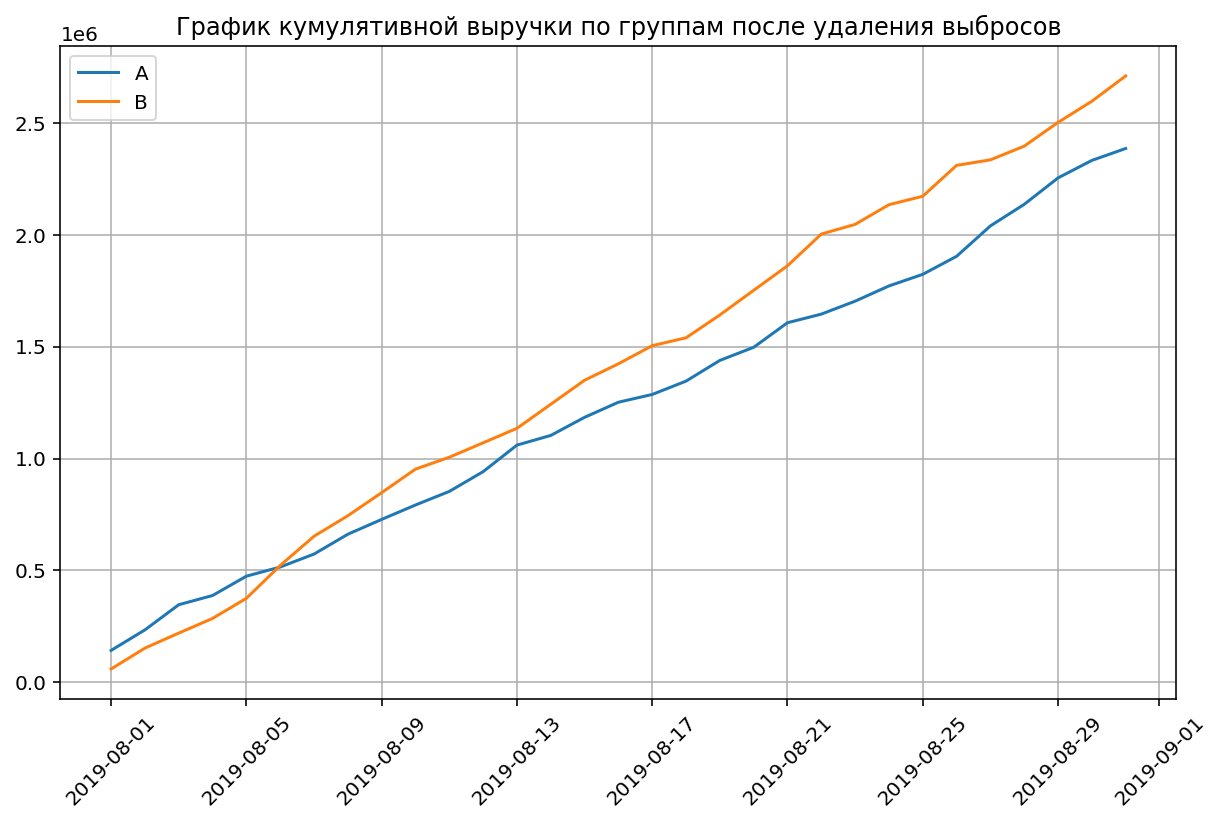

In [ ]:
fig = plt.figure(figsize=(10,6))
datesGroups1 = orders_new[['date', 'group']].drop_duplicates()

ordersAggregated1 = datesGroups1.apply(
    lambda x: orders_new[
        np.logical_and(
            orders_new['date'] <= x['date'], orders_new['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated1 = datesGroups1.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])



cumulativeData1 = ordersAggregated1.merge(
    visitorsAggregated1, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData1.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA1 = cumulativeData1[cumulativeData1['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB1 = cumulativeData1[cumulativeData1['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA1['date'], cumulativeRevenueA1['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB1['date'], cumulativeRevenueB1['revenue'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки по группам после удаления выбросов')
plt.xticks(rotation=45)
plt.show()

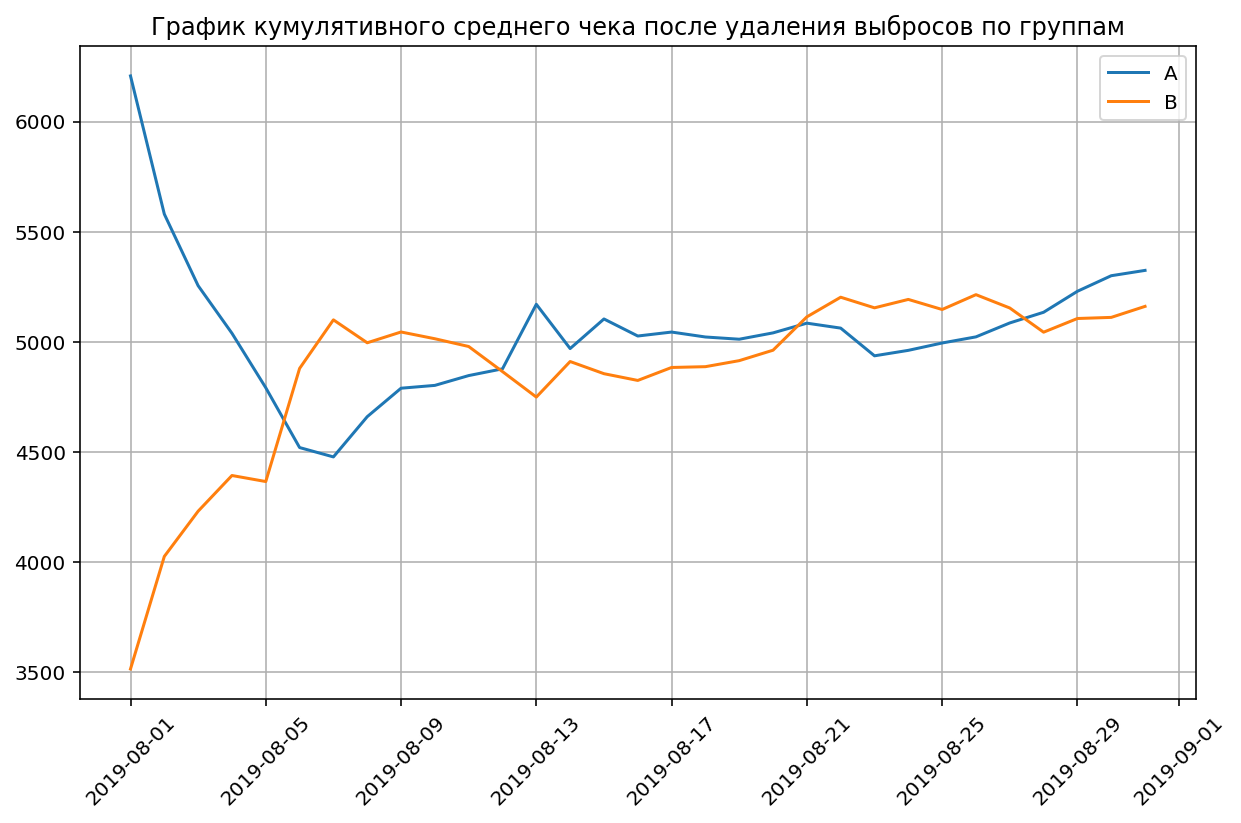

In [ ]:
#Построим графики среднего чека по группам после удаления выбросов — разделим кумулятивную выручку на кумулятивное число заказов:
fig = plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA1['date'], cumulativeRevenueA1['revenue']/cumulativeRevenueA1['orders'], label='A')
plt.plot(cumulativeRevenueB1['date'], cumulativeRevenueB1['revenue']/cumulativeRevenueB1['orders'], label='B')

plt.grid()
plt.legend()
plt.title('График кумулятивного среднего чека после удаления выбросов по группам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cumulativeRevenueA1.sort_values(by='date').tail(1)

,date,revenue,orders
60,2019-08-31,2385548,448


In [ ]:
cumulativeRevenueB1.sort_values(by='date').tail(1)

,date,revenue,orders
61,2019-08-31,2709781,525


## Вывод

Для корректного анализа теста нам пришлось удалить из выборки покупателей, которые вследствие технической ошибки попали сразу в обе группы, совершив заказы несколько раз. Также мы удалили из данных аномально дорогие заказы, (медианная сумма заказа около 3 тыс.руб., удалили заказы свыше 30 тыс.руб.). Только 3,7% покупателей сделали больше одного заказа, поэтому остальных также удалили из выборки.

После удаления аномальных данных и выбросов группы сравнялись по сумме среднего чека. Однако, кумулятивная выручка в группе В опередила кумулятивную выручку в группе А почти сразу после начала теста (на 6-й день), отрыв в группе В постоянно рос и составил 14%.

Конверсия в группе В также значительно выше, чем в группе А. По очищенным данным разница в коверсии составила 18% в пользу группы В.

Тест можно остановить, зафиксировав победу группы В.






